### installation

In [2]:
#!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 26.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 24.4 MB/s eta 0:00:00
DEPRECATION: nb-black 1.0.7 has a non-standard dependency specifier black>='19.3'; python_version >= "3.6". pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of nb-black or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [1]:
#conda install -c conda-forge pycaret

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64

done
Solving environment: done

## Package Plan ##

  environment location: /Users/namratamayekar/anaconda3/envs/pycaret

  added / updated specs:
    - pycaret


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       hf0a4a13_0         151 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         151 KB

The following packages will be UPDATED:

  ca-certificates                       2024.2.2-hf0a4a13_0 --> 2024.7.4-hf0a4a13_0 
  certifi                             2024.2.2-pyhd8ed1ab_0 --> 2024.6.2-pyhd8ed1ab_0 
  openssl                                  3.3.0-h0d3ecfb_0 --> 3.3.1-hfb2fe0b_1 



                                                                                
Preparin

### Imports

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_data_Namrata.csv')

In [4]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [5]:
# Define features and target variable
X = df[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'buy_price',
        'has_central_heating', 'has_individual_heating',
       'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior',
       'energy_certificate', 'has_parking', 'neighborhood', 'District',
       'HouseType']]
y = df['buy_price_by_area']

In [6]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso, ElasticNet


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



# Initialize models
logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

ridge_classifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RidgeClassifier())
])

lasso_logistic_regression_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(penalty='l1', solver='saga'))
])

elastic_net_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', ElasticNet())
])

# Train and evaluate


In [7]:
from pycaret.regression import *

In [8]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df,
    target = 'buy_price_by_area',
    session_id=9,
    )

,Description,Value
0,Session id,9
1,Target,buy_price_by_area
2,Target type,Regression
3,Original data shape,"(20885, 16)"
4,Transformed data shape,"(20885, 56)"
5,Transformed train set shape,"(14619, 56)"
6,Transformed test set shape,"(6266, 56)"
7,Numeric features,4
8,Categorical features,8
9,Preprocess,True


In [9]:
# compare baseline models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,107.6637,38871.5704,195.8247,0.9892,0.0417,0.0266,0.5740
rf,Random Forest Regressor,81.1656,46929.1958,214.4096,0.9870,0.0420,0.0187,0.6460
dt,Decision Tree Regressor,148.2533,109930.6440,329.8381,0.9696,0.0612,0.0333,0.0360
et,Extra Trees Regressor,214.8548,179997.3150,422.9187,0.9501,0.0915,0.0534,0.7620
gbr,Gradient Boosting Regressor,318.4035,209558.8569,457.1542,0.9418,0.1129,0.0859,0.1840
lr,Linear Regression,526.7747,593629.5314,769.5953,0.8354,0.2171,0.1429,0.2810
ridge,Ridge Regression,526.7419,593637.7494,769.6014,0.8354,0.2169,0.1429,0.0290
br,Bayesian Ridge,526.5759,593825.9307,769.7289,0.8353,0.2156,0.1428,0.0310
lasso,Lasso Regression,526.7570,595773.0475,771.0133,0.8347,0.2144,0.1429,0.0460
llar,Lasso Least Angle Regression,532.2211,605600.7769,777.3429,0.8320,0.2162,0.1446,0.0290


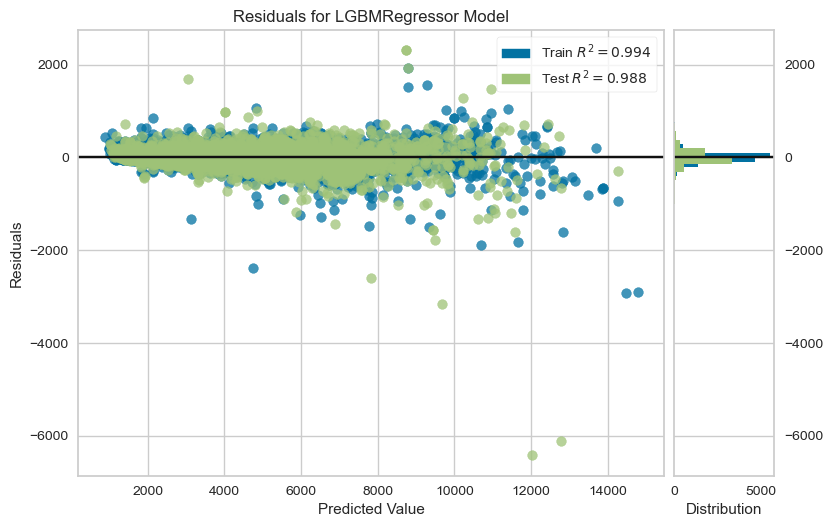

In [10]:
# plot residuals
plot_model(best_model, plot = 'residuals')

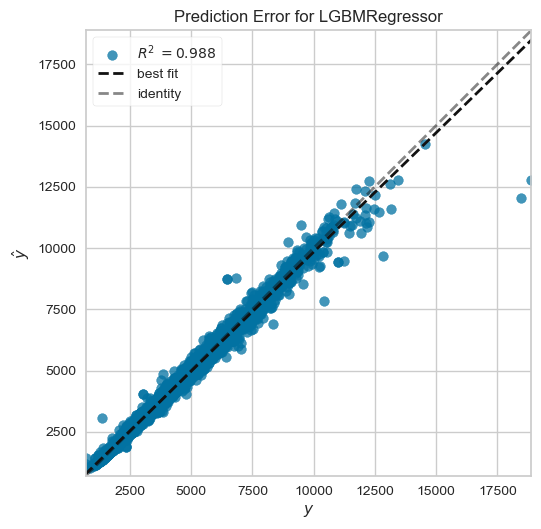

In [11]:
# plot error
plot_model(best_model, plot = 'error')

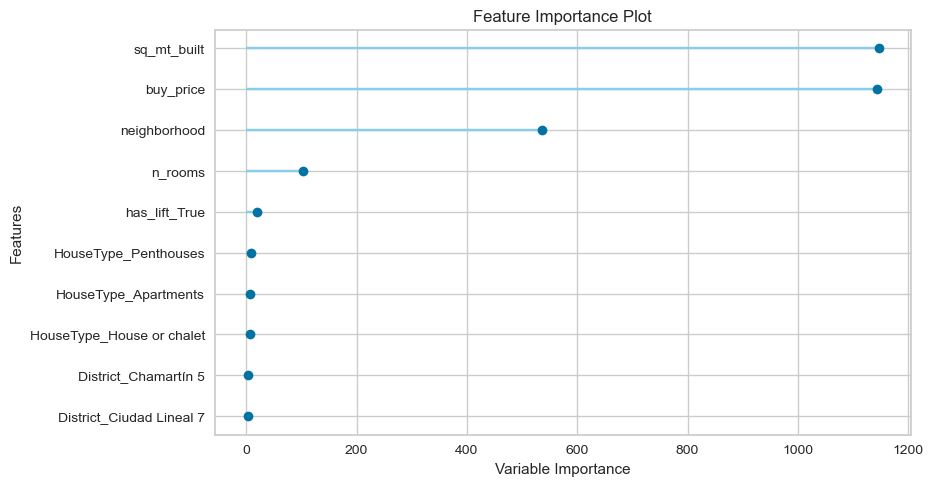

In [12]:
# plot feature importance
plot_model(best_model, plot = 'feature')

In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
### save model using pickle
#import pickle
#with open('model_pickle', 'wb') as f:
#   pickle.dump(model, f)
#with open('model_pickle', 'rb') as f:
#   mp = pickle.load(f)

#Or using joblib 
#from sklearn.externals import joblib
#joblib.dump(model, 'model_joblib')
#mj = joblib.load('model_joblib')